# Mini Project 
# Leukemia Prediction

In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
data=[]
label=[]
size=150

## 0-Normal cell
## 1-leukemia cell

In [4]:
path=r'1_training/hem/'
n=1
for file in os.listdir(path):
    img=cv2.imread(path+file)
    img=Image.fromarray(img,'RGB')
    img=img.resize((size,size))
    data.append(np.array(img))
    label.append(0)


In [5]:
path=r'1_training/all/'
n=1
for file in os.listdir(path):
    img=cv2.imread(path+file)
    img=Image.fromarray(img,'RGB')
    img=img.resize((size,size))
    data.append(np.array(img))
    label.append(1)


In [6]:
data=np.array(data)
label=np.array(label)



In [7]:
label.shape

(10661,)

In [8]:
data.shape

(10661, 150, 150, 3)

In [9]:
data=np.reshape(data, (data.shape[0], -1))
data[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,label,test_size=0.25,shuffle=True,random_state=12)

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
sgd=SGDClassifier(loss='log_loss')

In [13]:
sgd.fit(xtrain,ytrain)

SGDClassifier(loss='log_loss')

In [14]:
pred=sgd.predict(xtest)

In [15]:
pred[0:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [16]:
ytest[0:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
print("Score is: ",accuracy_score(ytest,pred))

Score is:  0.8154538634658665


In [19]:
confusion_matrix(ytest,pred)

array([[ 495,  343],
       [ 149, 1679]], dtype=int64)

In [20]:
imgf=xtest[20].reshape(size,size,3)

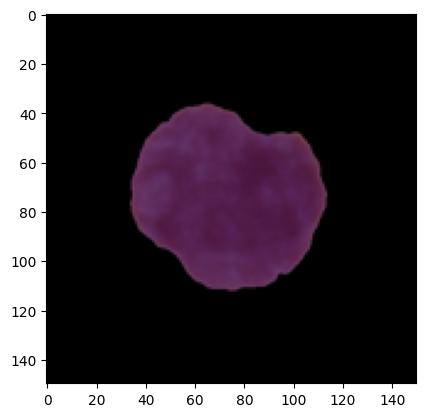

In [21]:
import matplotlib.pyplot as plt
plt.imshow(imgf)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
r=RandomForestClassifier(n_estimators=500,random_state=100)

In [25]:
r.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=500, random_state=100)

In [26]:
rypred=r.predict(xtest)

In [27]:
print("Score is: ",accuracy_score(ytest,rypred))

Score is:  0.8634658664666166


In [28]:
confusion_matrix(ytest,rypred)

array([[ 571,  267],
       [  97, 1731]], dtype=int64)